In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initial data screening

In [74]:
# load census data
df = pd.read_csv("USCensusTraining.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [75]:
df.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [76]:
df.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week
count,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000
mean,38.606920,1.897418e+05,10.081440,1088.579040,86.49992,40.407440
std,13.687769,1.052947e+05,2.557035,7486.621197,401.25358,12.299267
min,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.00000,40.000000
75%,48.000000,2.368610e+05,12.000000,0.000000,0.00000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.00000,99.000000


In [77]:
# transform the target variable
df['income'] = df['income'].map({'>50K.': 1, '<=50K.':0})
df.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [78]:
# specify target variable and predictors (continuous/categorical)
target = "income"
continuous = list(df.select_dtypes(include = "number").columns)
continuous.remove(target)
continuous

['age',
 'demogweight',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [79]:
categorical = list(df.select_dtypes(include = "object").columns)
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [80]:
# check the values of categories -> missing values
for col in categorical:
    print(df[col].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

In [81]:
# check the proportion of missing values
df.replace('?', np.NaN, inplace=True)
df.isna().sum()

age                  0
workclass         1399
demogweight          0
education            0
education-num        0
marital-status       0
occupation        1404
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     445
income               0
dtype: int64

In [82]:
# handling missing values - mode imputation
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
dfImp = pd.DataFrame(imp.fit_transform(df), columns=df.columns)
dfImp.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [83]:
dfImp.isna().sum()

age               0
workclass         0
demogweight       0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [84]:
# drop column adding little information
dfClean = dfImp.drop(columns='education-num')
dfClean.head()

,age,workclass,demogweight,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [85]:
continuous.remove('education-num')

# Exploratory data analysis

## Examining target variable

<Axes: title={'center': 'Income Distribution'}, xlabel='income'>

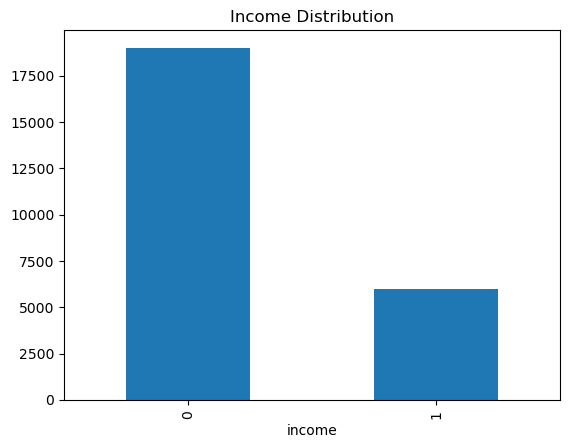

In [86]:
dfClean[target].value_counts().plot(kind='bar', title='Income Distribution')

## Examining numeric variables
descriptive stats and distribution

In [87]:
dfClean[continuous].describe()

,age,demogweight,capital-gain,capital-loss,hours-per-week
count,25000,25000,25000,25000,25000
unique,72,17824,117,89,94
top,23,203488,0,0,40
freq,688,12,22924,23844,11713


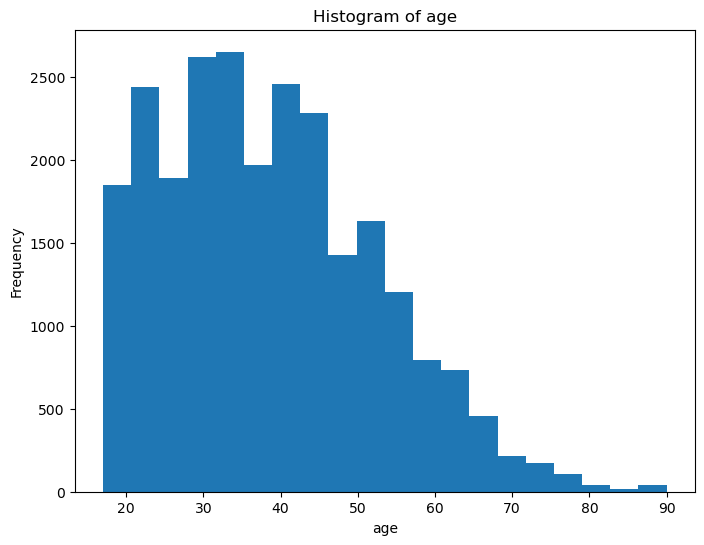

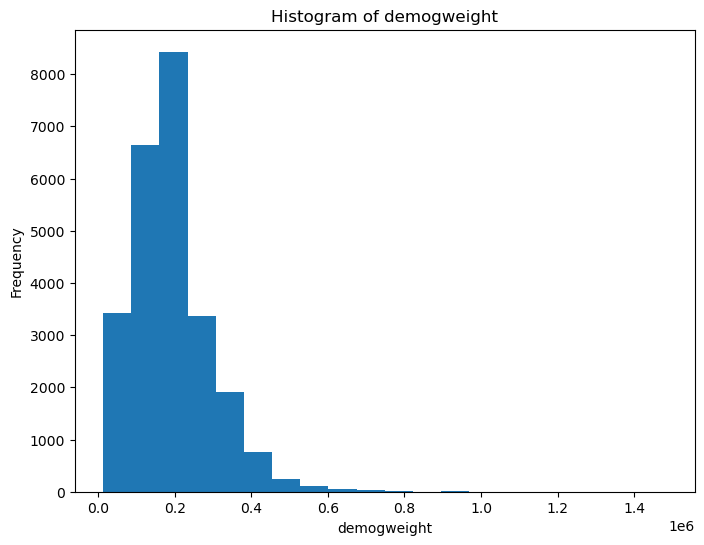

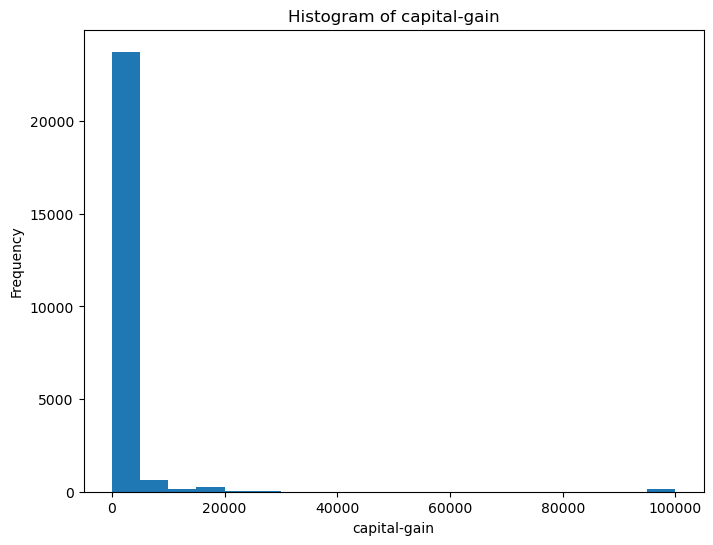

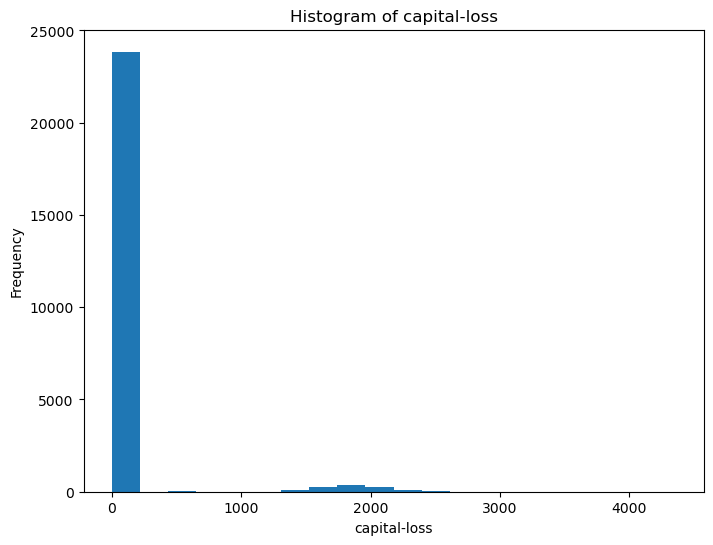

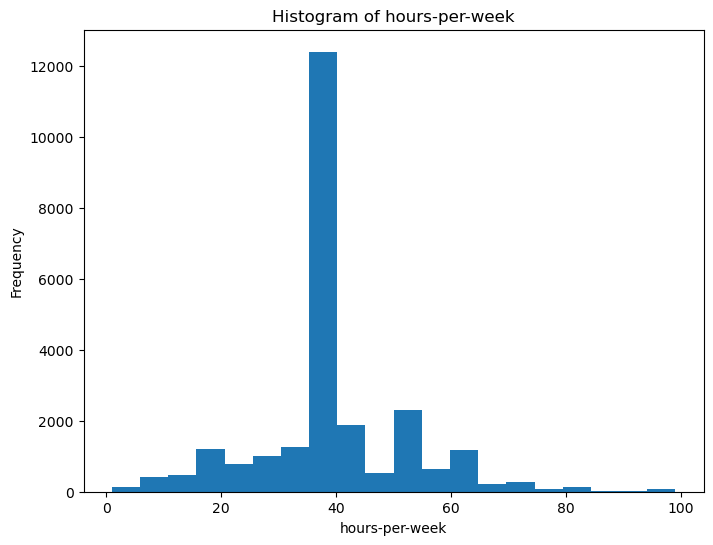

In [88]:
## Plot the histogram for continouns variables
for var in continuous:
    plt.figure(figsize=(8, 6))
    dfClean[var].hist(bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

## Categorical variables

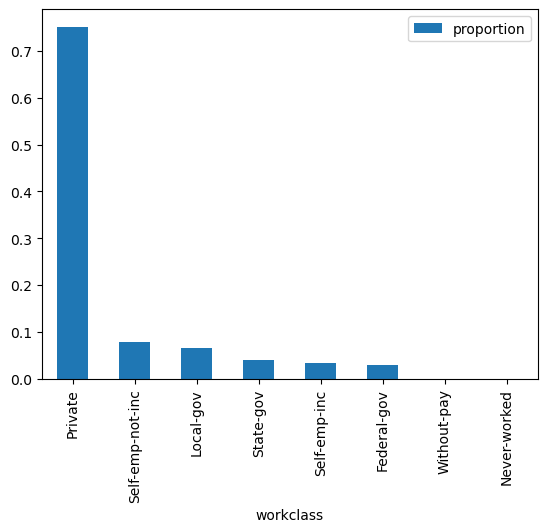

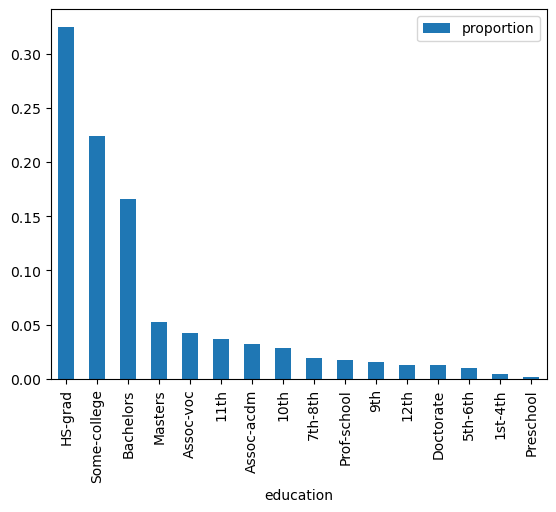

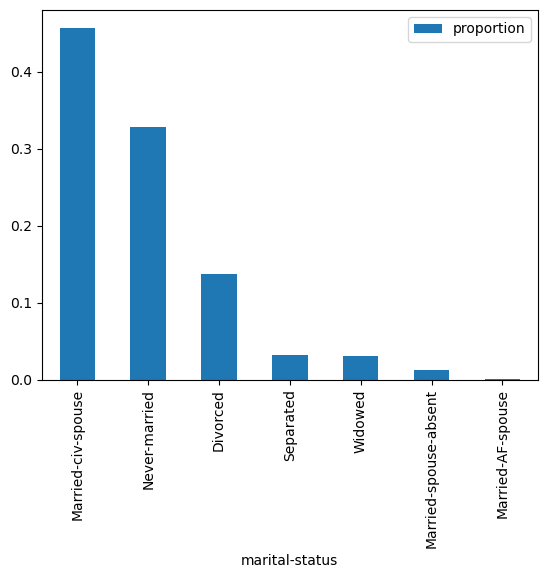

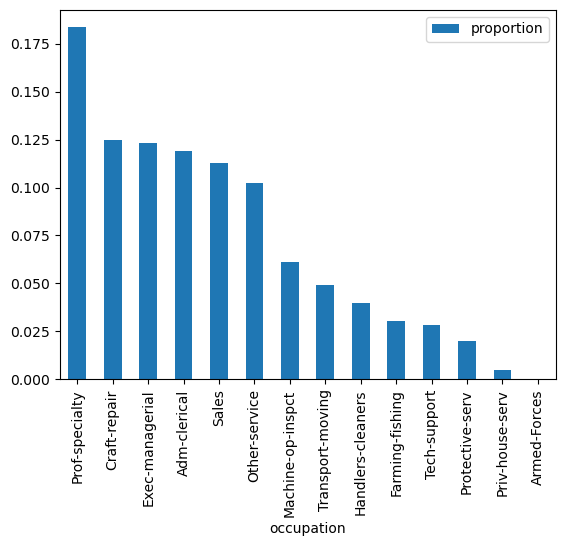

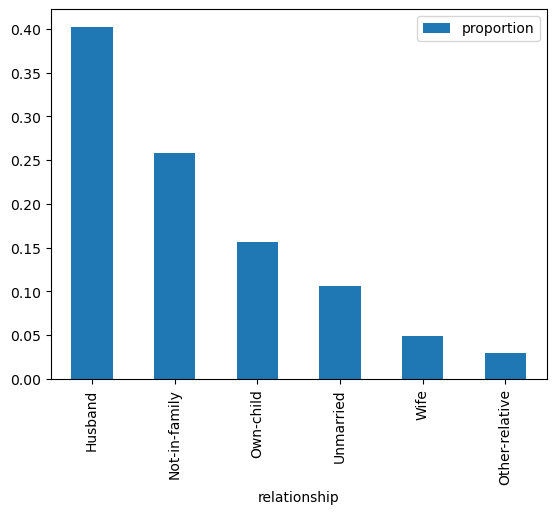

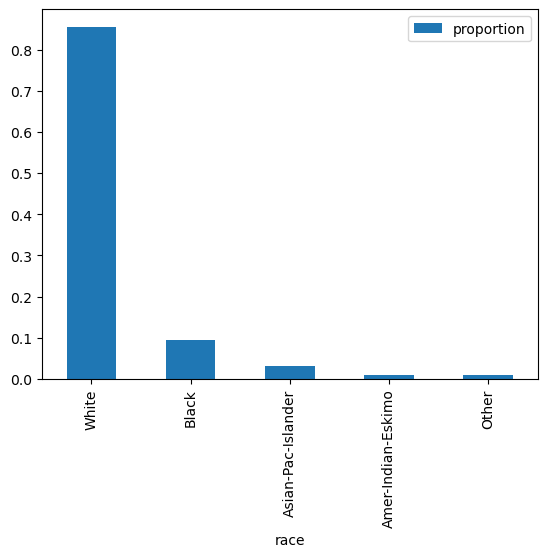

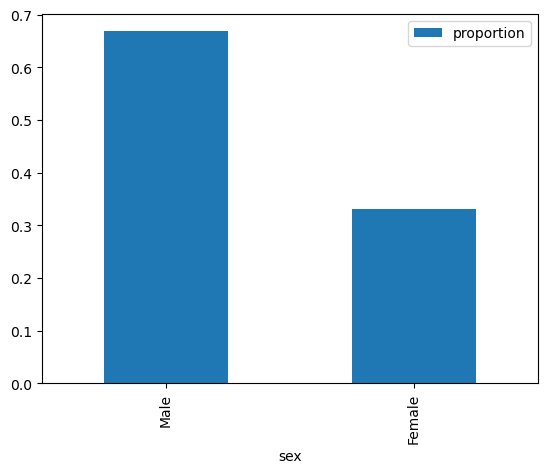

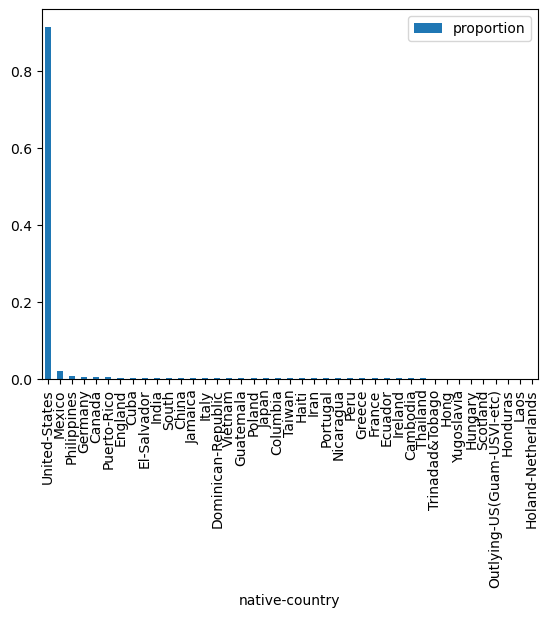

In [89]:
for var in categorical:
  count = dfClean[var].value_counts(normalize=True).reset_index()
  ax = count.plot.bar(x=var, y='proportion', rot=90)

## Check correlations between numeric data

In [90]:
dfImp[continuous].corr()

,age,demogweight,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075810,0.073591,0.056408,0.069045
demogweight,-0.075810,1.000000,0.004366,-0.012152,-0.015179
capital-gain,0.073591,0.004366,1.000000,-0.031346,0.079760
capital-loss,0.056408,-0.012152,-0.031346,1.000000,0.055278
hours-per-week,0.069045,-0.015179,0.079760,0.055278,1.000000


<Axes: >

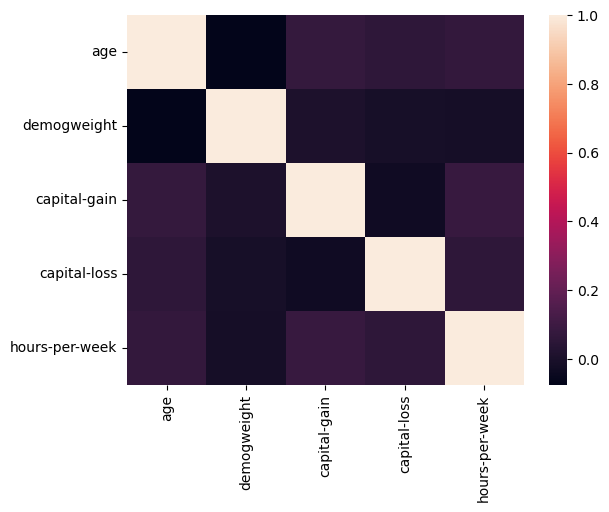

In [91]:
corr = dfImp[continuous].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Model 1

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Preprocessing

1.   scaling (MinMax)
2.   creating dummies (drop first to avoid multicollinearity)



In [93]:
# scale continuous variables between 0-1
scaler = preprocessing.MinMaxScaler()

In [94]:
dfNorm = dfClean.copy()
dfNorm[continuous] = scaler.fit_transform(dfNorm[continuous])

In [95]:
dfNorm.describe()

,age,demogweight,capital-gain,capital-loss,hours-per-week
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.295985,0.120521,0.010886,0.019858,0.402117
std,0.187504,0.071511,0.074867,0.092115,0.125503
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071772,0.000000,0.000000,0.397959
50%,0.273973,0.112786,0.000000,0.000000,0.397959
75%,0.424658,0.152522,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
# generating dummies
dfDummy = pd.get_dummies(dfNorm, columns=categorical, drop_first=True)
dfDummy.head()


,age,demogweight,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.044302,0.02174,0.0,0.397959,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.452055,0.048238,0.00000,0.0,0.122449,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.287671,0.138113,0.00000,0.0,0.397959,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.493151,0.151068,0.00000,0.0,0.397959,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0.150685,0.221488,0.00000,0.0,0.397959,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Splitting training & validation data

In [149]:
X = dfDummy.drop(columns=[target])
Y = dfDummy[target]

In [148]:
np.unique(Y, return_counts=True)

(array([0, 1], dtype=object), array([19016,  5984]))

In [98]:
test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [99]:
X_test.shape

(5000, 96)

## Build neural network

In [100]:
np.random.seed(42)
model = Sequential()

In [101]:
# add one hidden layer with 20 nodes
model.add(Dense(10, input_shape=(X_train.shape[1], ), activation="relu"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [102]:
# add the output layer
model.add(Dense(1, activation="sigmoid"))

In [103]:
#  specify parameters and compile
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Train the model

In [104]:
Xtrain = np.asarray(X_train).astype('float32')
ytrain = np.asarray(y_train).astype('float32')
model.fit(Xtrain, ytrain, epochs=10, batch_size=50)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.7080 - loss: 0.5217
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.8310 - loss: 0.3631
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8341 - loss: 0.3544
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.8340 - loss: 0.3507
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.8374 - loss: 0.3398
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8469 - loss: 0.3331
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.8418 - loss: 0.3372
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.8482 - loss: 0.3296
Epoch 9/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.8403 - loss: 0.3402
Epoch 10/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.8489 - loss: 0.3275


In [105]:
X_test = X_test.astype(np.float32)

In [106]:
# make predictions
predictions = model.predict(X_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step


In [107]:
# round to 0 or 1 as the final output
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 

## Evaluation

In [108]:
# compare the predictions against test labels to assess accuracy
Xtest = np.asarray(X_test).astype('float32')
ytest = np.asarray(y_test).astype('float32')

loss, accuracy = model.evaluate(Xtest, ytest)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy*100}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.8490 - loss: 0.3420
Test Loss: 0.3407937288284302
Test Accuracy: 84.52000021934509


In [109]:
# check the confusion matrix
pd.crosstab(y_test, rounded, normalize='all')

col_0,0,1
income,,
0,0.7052,0.05
1,0.1048,0.14


## Model visualization

In [110]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="topology.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Find the most important variable

By weights

In [111]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_weights

array([[ 2.91439623e-01, -2.10184410e-01,  7.77474716e-02,
        -2.09480420e-01, -1.62686966e-02, -2.44971380e-01,
         1.54305607e-01, -4.05681819e-01, -1.39196321e-01,
        -4.11670029e-01],
       [ 2.01376081e-01,  7.29588494e-02, -2.79003717e-02,
        -3.48824076e-02, -1.03337221e-01, -1.04050271e-01,
        -5.72634600e-02, -3.32748294e-01,  9.29499418e-02,
        -1.99221708e-02],
       [ 2.77501178e+00, -2.17508364e+00,  2.37409377e+00,
        -2.18388867e+00,  1.10874884e-01, -2.36892819e+00,
        -2.23272514e+00, -2.12803674e+00, -2.00675082e+00,
        -2.11728644e+00],
       [ 6.92968786e-01, -1.83640078e-01,  5.45402706e-01,
        -4.80031312e-01,  2.39121914e-01, -3.92927468e-01,
        -4.02165174e-01, -4.01080161e-01, -3.03777903e-01,
        -2.34663621e-01],
       [ 2.41669729e-01, -5.21159708e-01,  4.71985549e-01,
        -1.30417600e-01, -1.45950481e-01, -1.84396297e-01,
        -2.15483367e-01, -4.80164737e-01, -4.69155222e-01,
        -9.

In [112]:
weights = [sum(weightl)/len(weightl) for weightl in first_layer_weights]

In [113]:
inputs = list(X.columns)

In [114]:
dfWeight = pd.DataFrame({'input':inputs, 'weight':weights})
dfWeight['abs_weight'] = dfWeight['weight'].abs()
dfWeight.sort_values(by=['abs_weight'], ascending=False).head(10)

,input,weight,abs_weight
2,capital-gain,-0.995272,0.995272
17,education_9th,0.273014,0.273014
15,education_5th-6th,0.238703,0.238703
16,education_7th-8th,0.231828,0.231828
40,occupation_Priv-house-serv,0.208486,0.208486
48,relationship_Own-child,0.204972,0.204972
53,race_Other,0.193114,0.193114
24,education_Preschool,0.184148,0.184148
36,occupation_Farming-fishing,0.183874,0.183874
47,relationship_Other-relative,0.181769,0.181769


Importance score by sensitivity analysis

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

importances = []
for var in inputs:
  new_X_test = X_test.copy()
  new_X_test[var] = np.random.permutation(new_X_test[var].values)
  new_accuracy = model.evaluate(np.asarray(new_X_test).astype('float32'),
                                np.asarray(y_test).astype('float32'), verbose=0)[1]
  importances.append(new_accuracy - accuracy)

In [116]:
dfWeight['importance'] = pd.DataFrame({'importance': importances})
dfWeight.head()

,input,weight,abs_weight,importance
0,age,-0.111396,0.111396,-0.0026
1,demogweight,-0.031282,0.031282,0.0010
2,capital-gain,-0.995272,0.995272,-0.0228
3,capital-loss,-0.092079,0.092079,-0.0036
4,hours-per-week,-0.152955,0.152955,-0.0052


In [117]:
# important variables
dfWeight.sort_values(by=['importance']).head(10)

,input,weight,abs_weight,importance
2,capital-gain,-0.995272,0.995272,-0.0228
48,relationship_Own-child,0.204972,0.204972,-0.0100
22,education_HS-grad,0.085297,0.085297,-0.0100
46,relationship_Not-in-family,0.127402,0.127402,-0.0066
50,relationship_Wife,-0.022416,0.022416,-0.0062
28,marital-status_Married-civ-spouse,-0.000177,0.000177,-0.0058
9,workclass_Self-emp-not-inc,0.040563,0.040563,-0.0058
7,workclass_Private,0.084455,0.084455,-0.0056
30,marital-status_Never-married,0.113349,0.113349,-0.0054
39,occupation_Other-service,0.181140,0.181140,-0.0054


In [118]:
# unimportant variables
dfWeight.sort_values(by=['importance']).tail(10)

,input,weight,abs_weight,importance
64,native-country_France,-0.008591,0.008591,0.0000
90,native-country_Taiwan,0.097682,0.097682,0.0002
77,native-country_Jamaica,0.044364,0.044364,0.0004
43,occupation_Sales,-0.002687,0.002687,0.0004
76,native-country_Italy,0.000964,0.000964,0.0004
8,workclass_Self-emp-inc,0.069244,0.069244,0.0006
19,education_Assoc-voc,0.080583,0.080583,0.0006
26,education_Some-college,0.092079,0.092079,0.0006
1,demogweight,-0.031282,0.031282,0.0010
34,occupation_Craft-repair,0.015658,0.015658,0.0010


### Visualization: predictions

In [119]:
predicted_income = pd.DataFrame({"Prediction": rounded})
predicted_income.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [120]:
dfTest = dfClean.loc[X_test.index].reset_index(drop=True, inplace=False)
dfTest.head()

,age,workclass,demogweight,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,32,Private,128016,HS-grad,Married-spouse-absent,Other-service,Unmarried,White,Female,0,0,20,United-States,0
1,19,Private,574271,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,28,United-States,0
2,31,Private,382368,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,46,Local-gov,162566,Masters,Divorced,Prof-specialty,Unmarried,White,Female,0,0,50,Canada,0
4,17,Private,331552,12th,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0


In [121]:
dfPrediction = dfTest.join(predicted_income)
dfPrediction.head()

,age,workclass,demogweight,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Prediction
0,32,Private,128016,HS-grad,Married-spouse-absent,Other-service,Unmarried,White,Female,0,0,20,United-States,0,0
1,19,Private,574271,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,28,United-States,0,0
2,31,Private,382368,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0
3,46,Local-gov,162566,Masters,Divorced,Prof-specialty,Unmarried,White,Female,0,0,50,Canada,0,0
4,17,Private,331552,12th,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0,0


### Factors related to income > 50k

<Axes: title={'center': 'Occupations of people with income > 50k'}, xlabel='occupation'>

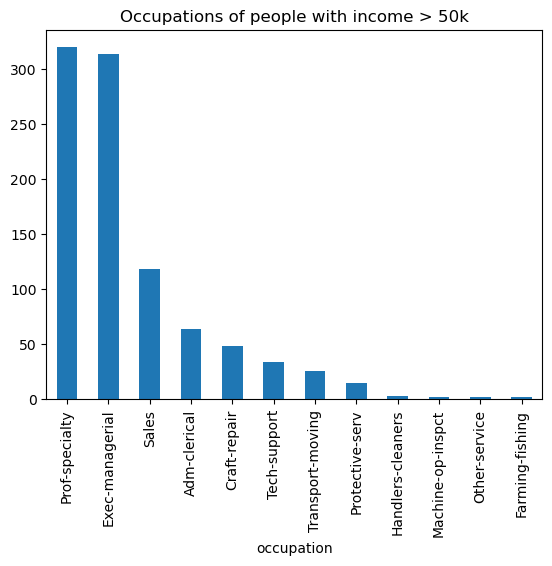

In [122]:
dfPrediction[dfPrediction['Prediction']==1]['occupation'].value_counts().plot(
    kind='bar', title='Occupations of people with income > 50k')

<Axes: title={'center': 'Education of people with income > 50k'}, xlabel='education'>

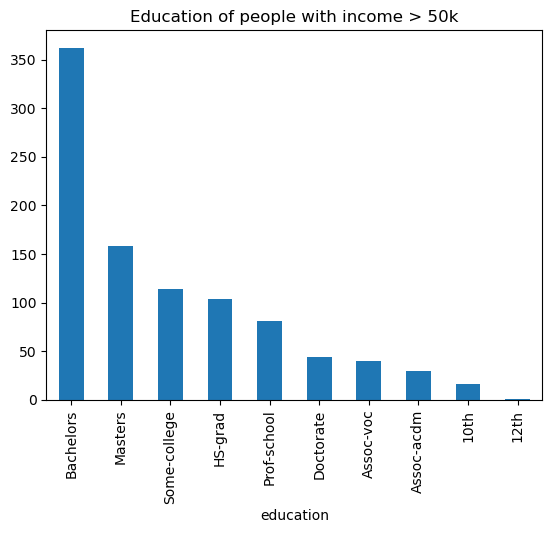

In [123]:
dfPrediction[dfPrediction['Prediction']==1]['education'].value_counts().plot(
    kind='bar', title='Education of people with income > 50k')

(array([ 51., 154., 238., 194., 135.,  95.,  51.,  22.,   8.,   2.]),
 array([22. , 28.8, 35.6, 42.4, 49.2, 56. , 62.8, 69.6, 76.4, 83.2, 90. ]),
 <BarContainer object of 10 artists>)

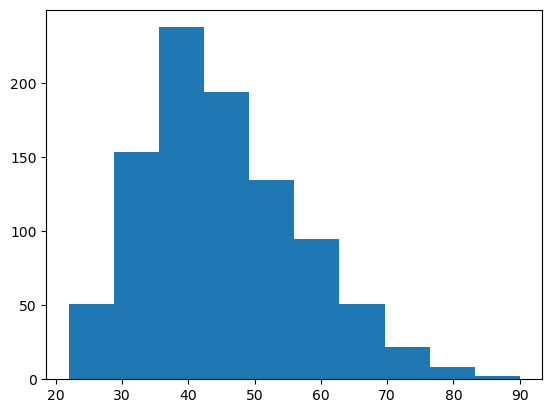

In [124]:
age_income = dfPrediction[dfPrediction["Prediction"] == 1] ["age"]
plt.hist([age_income], bins = 10)

### Important factors deciding income according to the model

In [125]:
import plotly.express as px

In [126]:
fig = px.histogram(dfPrediction, x="relationship", color="Prediction", barnorm="fraction")
fig.show()

In [127]:
fig = px.histogram(dfPrediction, x="marital-status", color="Prediction", barnorm="fraction")
fig.show()

In [128]:
fig = px.histogram(dfPrediction, x="education", color="Prediction", barnorm="fraction")
fig.show()

## Visualization: factors related to actual income

In [129]:
# Important numeric variable
fig = px.histogram(dfClean, x="capital-gain", color="income", barnorm="fraction")
fig.show()

In [130]:
# Unimportant numeric variable
fig = px.histogram(dfClean, x="demogweight", color="income", barnorm="fraction")
fig.show()

# Improving Model by Cross-validation

In [131]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [151]:
X_array = np.asarray(X).astype('float32')
Y_array = np.asarray(Y).astype('float32')

In [152]:
np.random.seed(42)

# Function to create a Keras model
def create_model(learning_rate=0.001, optimizer='adam',
                        neurons=32, activation='relu',
                        dropout_rate=0.0, weight_initializer='glorot_uniform'):

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)

    model = Sequential()

    # Add one hidden layer
    model.add(Dense(neurons, input_shape=(X_train.shape[1], ), activation=activation, kernel_initializer=weight_initializer))
    model.add(Dropout(dropout_rate))

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model_cv = KerasClassifier(build_fn=create_model, verbose=0,
                           learning_rate=0.001, optimizer='adam', # set some default parameters to allow the model to be tunable
                           neurons=32, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')

# Define parameters for Grid Search
param_dist_group1 = {
    'batch_size': [100, 200],
    'epochs': [20, 30, 40, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'neurons': [32, 64, 128],
    'activation': ['sigmoid', 'relu', 'tanh'],
    'dropout_rate': [0.0, 0.2, 0.4],
    'weight_initializer': ['glorot_uniform', 'he_normal']
}

# Perform Random Search
random = RandomizedSearchCV(estimator=model_cv, param_distributions=param_dist_group1, n_iter=20, cv=3)
random_result = random.fit(X_array, Y_array)

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/opt/anaconda3/lib/python3.12/site-packages/sc

In [153]:
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.849440 using {'weight_initializer': 'glorot_uniform', 'optimizer': 'sgd', 'neurons': 32, 'learning_rate': 0.01, 'epochs': 40, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'sigmoid'}


In [154]:
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

 mean=0.8178, std=0.02747 using {'weight_initializer': 'glorot_uniform', 'optimizer': 'adam', 'neurons': 64, 'learning_rate': 0.1, 'epochs': 40, 'dropout_rate': 0.4, 'batch_size': 100, 'activation': 'tanh'}
 mean=0.8239, std=0.01997 using {'weight_initializer': 'he_normal', 'optimizer': 'rmsprop', 'neurons': 128, 'learning_rate': 0.1, 'epochs': 20, 'dropout_rate': 0.2, 'batch_size': 200, 'activation': 'tanh'}
 mean=0.8402, std=0.00442 using {'weight_initializer': 'glorot_uniform', 'optimizer': 'rmsprop', 'neurons': 128, 'learning_rate': 0.1, 'epochs': 50, 'dropout_rate': 0.0, 'batch_size': 200, 'activation': 'sigmoid'}
 mean=0.847, std=0.001622 using {'weight_initializer': 'glorot_uniform', 'optimizer': 'sgd', 'neurons': 128, 'learning_rate': 0.1, 'epochs': 50, 'dropout_rate': 0.4, 'batch_size': 200, 'activation': 'sigmoid'}
 mean=0.8484, std=0.005656 using {'weight_initializer': 'glorot_uniform', 'optimizer': 'rmsprop', 'neurons': 128, 'learning_rate': 0.1, 'epochs': 20, 'dropout_rate

## Test on the test dataset to see the accuracy

In [155]:
Test_data = pd.read_csv("USCensusTest.csv")

In [156]:
continuous = list(Test_data.select_dtypes(include = "number").columns)
categorical = list(Test_data.select_dtypes(include = "object").columns)
imp = SimpleImputer(missing_values='?', strategy="most_frequent")
Test_data = pd.DataFrame(imp.fit_transform(Test_data), columns=Test_data.columns)
scaler = preprocessing.MinMaxScaler()
Test_data[continuous] = scaler.fit_transform(Test_data[continuous])

In [157]:
Test_data = Test_data.drop(columns=['education-num'])
Test_data = pd.get_dummies(Test_data, columns=categorical, drop_first = True)
Test_data

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.369863,0.129191,0.000000,0.0,0.438776,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.041096,0.160534,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.397260,0.073703,0.000000,0.0,0.367347,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.301370,0.132520,0.000000,0.0,0.500000,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.232877,0.143645,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.136986,0.212212,0.000000,0.0,0.377551,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
7557,0.315068,0.122522,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
7558,0.561644,0.120374,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
7559,0.068493,0.163578,0.000000,0.0,0.193878,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [158]:
Test_data.head()

,age,demogweight,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.369863,0.129191,0.0,0.0,0.438776,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.041096,0.160534,0.0,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.397260,0.073703,0.0,0.0,0.367347,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.301370,0.132520,0.0,0.0,0.500000,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.232877,0.143645,0.0,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [159]:
# Fit 0 values into the missing column
for col in X:
    if col not in Test_data.columns:
        Test_data[col] = 0

In [160]:
#best model use for test_dataset
best_params =  {'weight_initializer': 'glorot_uniform', 'optimizer': 'sgd', 'neurons': 32, 'learning_rate': 0.01, 'epochs': 40, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'sigmoid'}

def create_best_model(neurons=32):

    model = Sequential()

    # Add one hidden layer
    model.add(Dense(best_params['neurons'],input_shape=(Test_data.shape[1], ), activation=best_params['activation'], kernel_initializer=best_params['weight_initializer']))
    model.add(Dropout(best_params['dropout_rate']))

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer configuration
    optimizer = SGD(learning_rate=best_params['learning_rate'])

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Build the best model
best_ann = KerasClassifier(build_fn=create_model, verbose=0,
                           learning_rate=0.001, optimizer='sgd', # set some default parameters
                           neurons=32, activation='sigmoid',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')
best_ann._estimator_type = "classifier"

best_ann.fit(X_array, Y_array, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the model on the not_use set
predictions = best_ann.predict(Test_data)

/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [161]:
dfPredTest = pd.DataFrame({'prediction': predictions})

In [162]:
# save predictions to cvs
dfPredTest.to_csv('USCensusTest_Predicted.csv', index=False)